<a href="https://colab.research.google.com/github/aludi/DL-practical-1/blob/main/Deep_Learning_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# source used for preprocessing steps of the data:  https://www.tensorflow.org/tutorials/keras/classification

import numpy as np
import random
from matplotlib import pyplot as plt
import tensorflow as tf
import pathlib
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input
from numpy.random import seed
tf.random.set_seed(1)
seed(1)

# loading dataset
fashion = tf.keras.datasets.fashion_mnist # already a standard keras dataset, apparently
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # -> [0...9], class labels

# scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

# shuffle the input data, just to be sure
df = np.c_[train_images.reshape(len(train_images), -1), train_labels.reshape(len(train_labels), -1)]
train_images = df[:, :train_images.size//len(train_images)].reshape(train_images.shape)
train_labels = df[:, train_images.size//len(train_images):].reshape(train_labels.shape)
np.random.shuffle(df) # examples are now shuffled.

# decrease dataset to ensure reasonable computation time 
train_images = train_images[1:5000]
train_labels = train_labels[1:5000]


def reset_seed():
    tf.random.set_seed(1)
    seed(1)
    
# regular feedforward ANN
def MLP_feedforward(nr_neurons, nr_layers, activation, optimizer, convolutional):
    reset_seed()
    # build MLP
    model = tf.keras.models.Sequential()
    if convolutional:
        model.add(tf.keras.layers.Conv2D(32, (3, 3),input_shape=(28, 28, 1), activation=activation))
        model.add(tf.keras.layers.Flatten())
    else:
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    for i in range(1, nr_layers+1):
        model.add(tf.keras.layers.Dense(nr_neurons, activation=activation))
    model.add(tf.keras.layers.Dense(10))
    x_train = train_images.reshape(-1, 28, 28, 1)
    x_test = test_images.reshape(-1, 28, 28, 1)
    # compiling the model, optimiser, loss function, and counting on accuracy
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    model.fit(x_train, train_labels, epochs=10, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=0)
    print('\nTest accuracy:', test_acc)  # 87% accuracy, generalizes okay I guess.
    return test_loss, test_acc

def Res_Net_50(optimizer):
    reset_seed()
    # using pre-implemented models
    # resnet
    new_input = Input(shape=(28, 28, 1))
    model = ResNet50(weights=None, input_tensor=new_input, classes=10)
    model.compile(optimizer=optimizer,
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10, verbose=2)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print("resnet performance on test set: loss: ", test_loss, " , accuracy: ", test_acc)
    return test_loss, test_acc

print("done")

4423680/4422102 [==============================] - 0s 0us/step
done


Obtain results feedforward ANN

In [ ]:
import csv
import pandas

# construct performance database
x_vals1 = None
x_vals1 = {}
y_vals = {}
activation_functions = ['relu', 'tanh', 'sigmoid']#, 'softmax']
optimizers = ["adam", "SGD"]#, "RMSProp", "Nadam"]
conv = [True, False]
nodes = [4, 8, 16, 32, 64, 128]
layers = [1, 3, 8]


accuracy_list = []
for activation_function in activation_functions:
    for optimizer in optimizers:
        name = f"{activation_function} & {optimizer}"
        x_vals[name] = []
        y_vals[name] = []

        for hidden_node in nodes:

            for hidden_layers in layers:
                for conv_val in conv:
                  test_loss, test_acc = MLP_feedforward(nr_neurons=hidden_node,
                                                        nr_layers=hidden_layers,
                                                        activation=activation_function,
                                                        optimizer=optimizer,
                                                        convolutional=conv_val)
                  print(f"{name}_{hidden_node}_{hidden_layers}: accuracy: {test_acc}")
                  accuracy_list.append([activation_function,optimizer,hidden_node, hidden_layers, conv_val, test_acc])


x_vals1 = accuracy_list
df = pandas.DataFrame(x_vals1)
file_test = pandas.DataFrame(df)
df.to_csv(index=False)
compression_opts = dict(method='zip',archive_name='outFIN.csv')  
df.to_csv('outFIN.zip', index=False, compression=compression_opts)  
print("done")


Test accuracy: 0.7878000140190125
relu & adam_4_1: accuracy: 0.7878000140190125

Test accuracy: 0.6137999892234802
relu & adam_4_1: accuracy: 0.6137999892234802

Test accuracy: 0.35350000858306885
relu & adam_4_3: accuracy: 0.35350000858306885

Test accuracy: 0.7131999731063843
relu & adam_4_3: accuracy: 0.7131999731063843

Test accuracy: 0.4722999930381775
relu & adam_4_8: accuracy: 0.4722999930381775

Test accuracy: 0.6057999730110168
relu & adam_4_8: accuracy: 0.6057999730110168

Test accuracy: 0.8452000021934509
relu & adam_8_1: accuracy: 0.8452000021934509

Test accuracy: 0.8094000220298767
relu & adam_8_1: accuracy: 0.8094000220298767

Test accuracy: 0.8224999904632568
relu & adam_8_3: accuracy: 0.8224999904632568

Test accuracy: 0.8004000186920166
relu & adam_8_3: accuracy: 0.8004000186920166

Test accuracy: 0.746399998664856
relu & adam_8_8: accuracy: 0.746399998664856

Test accuracy: 0.7229999899864197
relu & adam_8_8: accuracy: 0.7229999899864197

Test accuracy: 0.8507999777

In [ ]:
x_vals1 = accuracy_list
df = pandas.DataFrame(x_vals1)
file_test = pandas.DataFrame(df)
df.to_csv(index=False)
compression_opts = dict(method='zip',archive_name='outFIN.csv')  
df.to_csv('outFIN.zip', index=False, compression=compression_opts)  
print("done")

done


Obtain results ResNet50

In [2]:
import csv
import pandas
x_vals = {}
accuracy_list = []
optimizers = ["adam", "SGD"]#, "RMSProp", "Nadam"]
conv_val = False
nodes = [4, 8, 16, 32, 64, 128]
layers = [1, 3, 8]
for optimizer in optimizers:
  name = f"ResNet50 & {optimizer}"
  x_vals[name] = []
  #y_vals[name] = []

  test_loss, test_acc = Res_Net_50("SGD")
  print(f"{name}_: accuracy: {test_acc}")

  # make flat line for ResNet50
  for hidden_node in nodes:
    for hidden_layers in layers:
      x_vals[name].append(np.log(hidden_node))
      accuracy_list.append(["ResNet50",optimizer,hidden_node, hidden_layers, conv_val, test_acc])



x_vals1 = accuracy_list
df = pandas.DataFrame(x_vals1)
file_test = pandas.DataFrame(df)
df.to_csv(index=False)
compression_opts = dict(method='zip',archive_name='outFIN.csv')  
df.to_csv('outFINResNet50.zip', index=False, compression=compression_opts)  
print("done")


Epoch 1/10
157/157 - 333s - loss: 1.9486 - accuracy: 0.5621
Epoch 2/10
157/157 - 321s - loss: 0.9148 - accuracy: 0.7201
Epoch 3/10
157/157 - 320s - loss: 0.9683 - accuracy: 0.6887
Epoch 4/10
157/157 - 320s - loss: 0.7686 - accuracy: 0.7548
Epoch 5/10
157/157 - 318s - loss: 0.5379 - accuracy: 0.7994
Epoch 6/10
157/157 - 318s - loss: 0.5588 - accuracy: 0.8008
Epoch 7/10
157/157 - 319s - loss: 0.5198 - accuracy: 0.8132
Epoch 8/10
157/157 - 318s - loss: 0.4975 - accuracy: 0.8214
Epoch 9/10
157/157 - 316s - loss: 0.4213 - accuracy: 0.8502
Epoch 10/10
157/157 - 328s - loss: 0.3405 - accuracy: 0.8738
313/313 - 37s - loss: 0.6438 - accuracy: 0.7680
resnet performance on test set: loss:  0.6438132524490356  , accuracy:  0.7680000066757202
ResNet50 & adam_: accuracy: 0.7680000066757202
Epoch 1/10
157/157 - 328s - loss: 1.9486 - accuracy: 0.5621
Epoch 2/10
157/157 - 322s - loss: 0.9148 - accuracy: 0.7201
Epoch 3/10
157/157 - 323s - loss: 0.9683 - accuracy: 0.6887
Epoch 4/10
157/157 - 321s - loss:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

plot result 

tanh & adam
sigmoid & adam
relu & adam
ResNet50 & adam


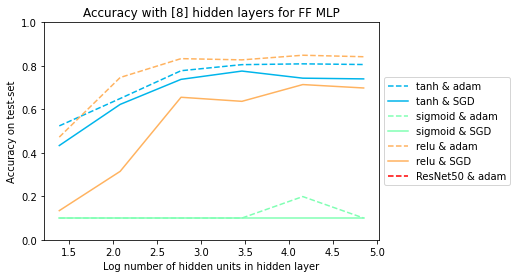

In [ ]:
# fix keys
x_vals_res = {}
y_vals_res = {}
#x_vals_res[f"ResNet50 & adam"] = x_vals[f"ResNet50 & adam"]
#y_vals_res[f"ResNet50 & adam"] = y_vals[f"ResNet50 & adam"]
#x_vals_res[f"ResNet50 & SGD"] = x_vals[f"ResNet50 & SGD"]
#y_vals_res[f"ResNet50 & SGD"] = y_vals[f"ResNet50 & SGD"]
#x_vals[f"ResNet50 & adam"] = x_vals_res[f"ResNet50 & adam"]
#y_vals[f"ResNet50 & adam"] = y_vals_res[f"ResNet50 & adam"]
#x_vals[f"ResNet50 & SGD"] = x_vals_res[f"ResNet50 & SGD"]
#y_vals[f"ResNet50 & SGD"] = y_vals_res[f"ResNet50 & SGD"]

# make plot
fig, ax = plt.subplots()
n = len(x_vals.keys())
color=iter(plt.cm.rainbow(np.linspace(0,1, int(round(n/2,0)+1))))
c = next(color)
for key in sorted(x_vals.keys(), reverse=True):
  lineStyle = "-"
  if "adam" in key:
    print(key)
    lineStyle = "--"
    c = next(color)
  plt.plot(x_vals[key], y_vals[key], color=c, label=key, linestyle=lineStyle)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, 1)
plt.xlabel("Log number of hidden units in hidden layer")
plt.ylabel("Accuracy on test-set")
plt.title(f"Accuracy with {layers} hidden layers for FF MLP")
plt.show()